In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the yfinance package.
import yfinance as yf
import pandas as pd
from typing import List

def download_stocks(tickers: List[str]) -> List[pd.DataFrame]:
    """
    Downloads stock data from Yahoo Finance.

    Args:
        tickers: A list of stock tickers.

    Returns:
        A list of Pandas DataFrames, one for each stock.
    """

    # Create a list of DataFrames.
    df_list = []

    # Iterate over the tickers.
    for ticker in tickers:
        # Download the stock data.
        df = yf.download(ticker)

        # Add the DataFrame to the list.
        df_list.append(df)

    return df_list

In [ ]:
list_of_stocks = download_stocks(['GOOGL', 'MSFT', 'IBM', 'AMZN', 'NFLX'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
! pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import mplfinance as mpf
import pandas as pd

def plot_candlestick(df: pd.DataFrame) -> None:
    """
    This function takes a pandas DataFrame as input and plots a 
    candlestick plot using the 'Open', 'High', 'Low', and 'Close' columns.

    Parameters:
    df (pd.DataFrame): A pandas DataFrame with 'Open', 'High', 'Low', and 'Close' columns.

    Returns:
    None
    """
    # Ensure the DataFrame is sorted by date
    df = df.sort_index()

    # Create a candlestick plot
    mpf.plot(df, type='candle', style='charles',
             title='Candlestick chart',
             ylabel='Price',
             volume=True,
             ylabel_lower='Shares\nTraded Volume',
             mav=(20, 50))  # moving averages


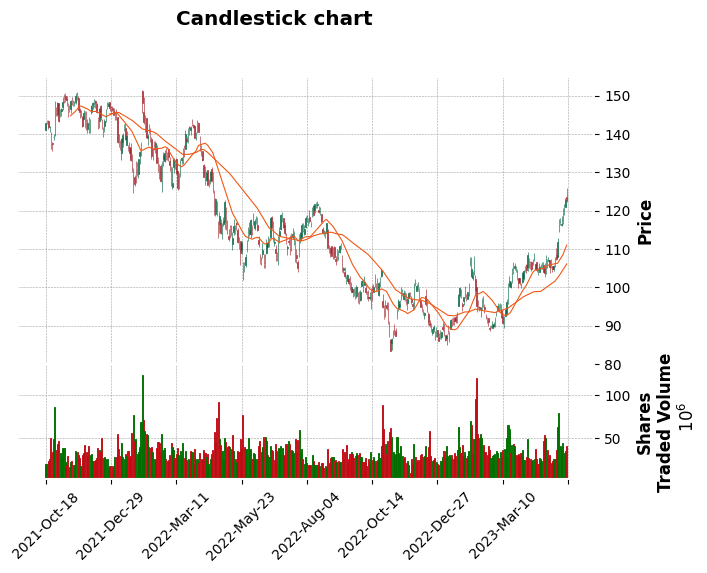

In [ ]:
plot_candlestick(list_of_stocks[0])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def moving_average_strategy(df: pd.DataFrame, short_window: int = 40, long_window: int = 100) -> None:
    """
    This function takes in a dataframe with stock data, two integers representing the periods for short-term and 
    long-term moving averages and plots the moving average crossover strategy.
    
    :param df: DataFrame containing stock data
    :param short_window: Integer representing the short-term moving average period. Default is 40.
    :param long_window: Integer representing the long-term moving average period. Default is 100.
    :return: None
    """

    # Calculate the short-term moving average
    df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()

    # Calculate the long-term moving average
    df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

    # Create a column 'Buy_Signal' where if short-term MA > long-term MA then True else False
    df['Buy_Signal'] = (df['Short_MA'] > df['Long_MA'])

    # Create a column 'Sell_Signal' where if short-term MA < long-term MA then True else False
    df['Sell_Signal'] = (df['Short_MA'] < df['Long_MA'])

    # Plotting
    plt.figure(figsize=(12,5))
    plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.35)
    plt.plot(df['Short_MA'], label=f'Short-term MA ({short_window} periods)', color='red', linestyle='--')
    plt.plot(df['Long_MA'], label=f'Long-term MA ({long_window} periods)', color='black', linestyle='--')
    plt.scatter(df.index, df['Buy_Signal'] * df['Close'], color='green', marker='^', alpha=1)
    plt.scatter(df.index, df['Sell_Signal'] * df['Close'], color='red', marker='v', alpha=1)
    plt.title('Moving Average Crossover Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


<ipython-input-8-56974e7ef3b2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
<ipython-input-8-56974e7ef3b2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()
<ipython-input-8-56974e7ef3b2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

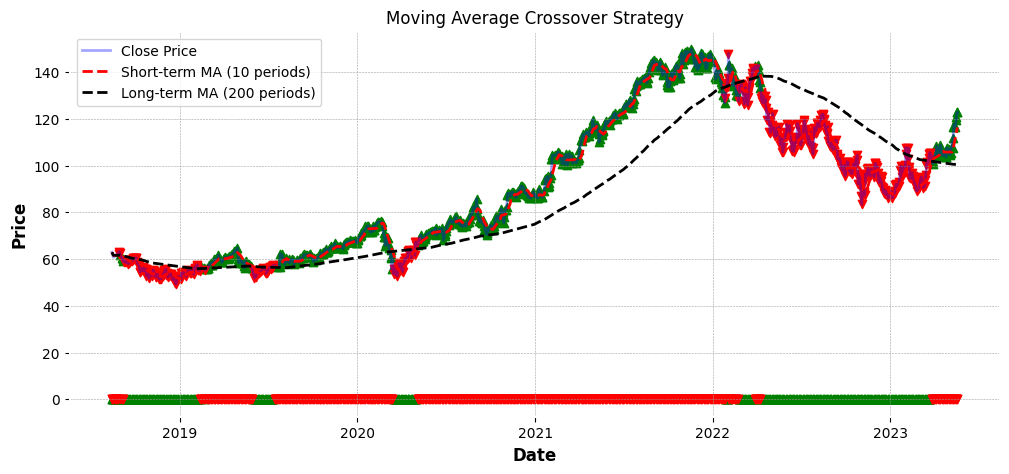

In [ ]:
moving_average_strategy(list_of_stocks[0].tail(1200), short_window=10, long_window=200)